In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import sys
import os
sys.path.append(os.path.abspath("../"))

from time import time
from mpl_toolkits.mplot3d import Axes3D
from learn import CompassModel, angdist

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor

names = [
#     "seville-cr-32-20170321",
    "seville-cr-32-20170621",
#     "seville-cr-32-20170921",
#     "seville-cr-32-20171221",
    "seville-cr-32-20170601"
]

# Load training data
x, y = CompassModel.load_dataset(names[:-1], pol=True, y_shape=(-1, 1))
x = x.reshape((x.shape[0], -1))
i = np.all(~np.isnan(x), axis=1)
x, y = x[i], y[i].squeeze()
print "Train:", x.shape, y.shape

Using TensorFlow backend.


Loading 'seville-cr-32-20170621.npz' ...
Train: (10440, 12416) (10440,)


In [2]:
# PCA
pca = PCA(n_components=4)
print "Reducing dimensions..."
t0 = time()
pca.fit(x)
x_pca = pca.transform(x)
t1 = time()
eigenvectors = pca.components_
eigenvalues = np.array(pca.explained_variance_)
print "New train:", x_pca.shape, "in %.2f sec" % (t1 - t0)
print "Eigenvalues:",
for eigenvalue in eigenvalues:
    print "%.2f" % (eigenvalue / eigenvalues.sum()),
print ""

Reducing dimensions...
New train: (10440, 4) in 8.36 sec
Eigenvalues: 0.28 0.28 0.22 0.22 


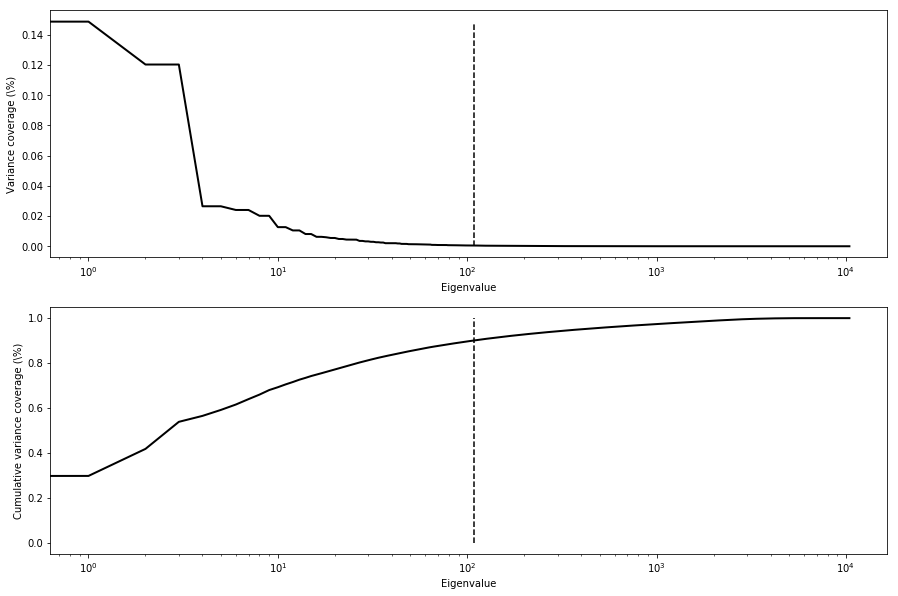

In [16]:
eigen_cum = [eigenvalues[0] / eigenvalues.sum()]
for e in eigenvalues[1:] / eigenvalues.sum():
    eigen_cum.append(eigen_cum[-1] + e)
eigen_cum = np.array(eigen_cum)
i, = np.where(eigen_cum >= .9)

plt.figure(1, figsize=(15, 10))

plt.subplot(211)
plt.plot(eigenvalues / eigenvalues.sum(), 'k-', lw=2)
plt.plot([i[0], i[0]], [0., eigenvalues[0] / eigenvalues.sum()], 'k--')
plt.xscale('log')
plt.xlabel("Eigenvalue")
plt.ylabel("Variance coverage (\%)")

plt.subplot(212)
plt.plot(eigen_cum, 'k-', lw=2)
plt.plot([i[0], i[0]], [0., 1.], 'k--')
plt.xscale('log')
plt.xlabel("Eigenvalue")
plt.ylabel("Cumulative variance coverage (\%)")

plt.show()

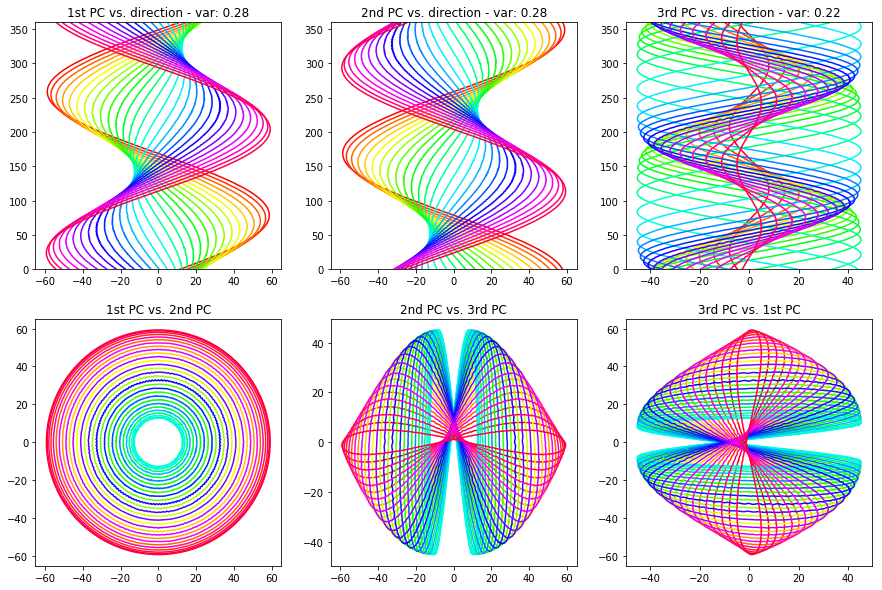

In [3]:
N = x_pca.shape[0] / 360
plt.figure(1, figsize=(15, 10))
plt.subplot(231)
for i in xrange(N):
    plt.plot(x_pca[(i*360):((i+1)*360), 0], np.rad2deg(y[(i*360):((i+1)*360)]), color=cmx.hsv(i/float(N)))
plt.ylim([0, 360])
plt.title("1st PC vs. direction - var: %.2f" % (eigenvalues[0] / eigenvalues.sum()))

plt.subplot(232)
for i in xrange(N):
    plt.plot(x_pca[(i*360):((i+1)*360), 1], np.rad2deg(y[(i*360):((i+1)*360)]), color=cmx.hsv(i/float(N)))
plt.ylim([0, 360])
plt.title("2nd PC vs. direction - var: %.2f" % (eigenvalues[1] / eigenvalues.sum()))

plt.subplot(233)
for i in xrange(N):
    plt.plot(x_pca[(i*360):((i+1)*360), 2], np.rad2deg(y[(i*360):((i+1)*360)]), color=cmx.hsv(i/float(N)))
plt.ylim([0, 360])
plt.title("3rd PC vs. direction - var: %.2f" % (eigenvalues[2] / eigenvalues.sum()))

plt.subplot(234)
for i in xrange(N):
    plt.plot(x_pca[(i*360):((i+1)*360), 0], x_pca[(i*360):((i+1)*360), 1], color=cmx.hsv(i/float(N)))
plt.title("1st PC vs. 2nd PC")

plt.subplot(235)
for i in xrange(N):
    plt.plot(x_pca[(i*360):((i+1)*360), 1], x_pca[(i*360):((i+1)*360), 2], color=cmx.hsv(i/float(N)))
plt.title("2nd PC vs. 3rd PC")

plt.subplot(236)
for i in xrange(N):
    plt.plot(x_pca[(i*360):((i+1)*360), 2], x_pca[(i*360):((i+1)*360), 0], color=cmx.hsv(i/float(N)))
plt.title("3rd PC vs. 1st PC")

plt.show()

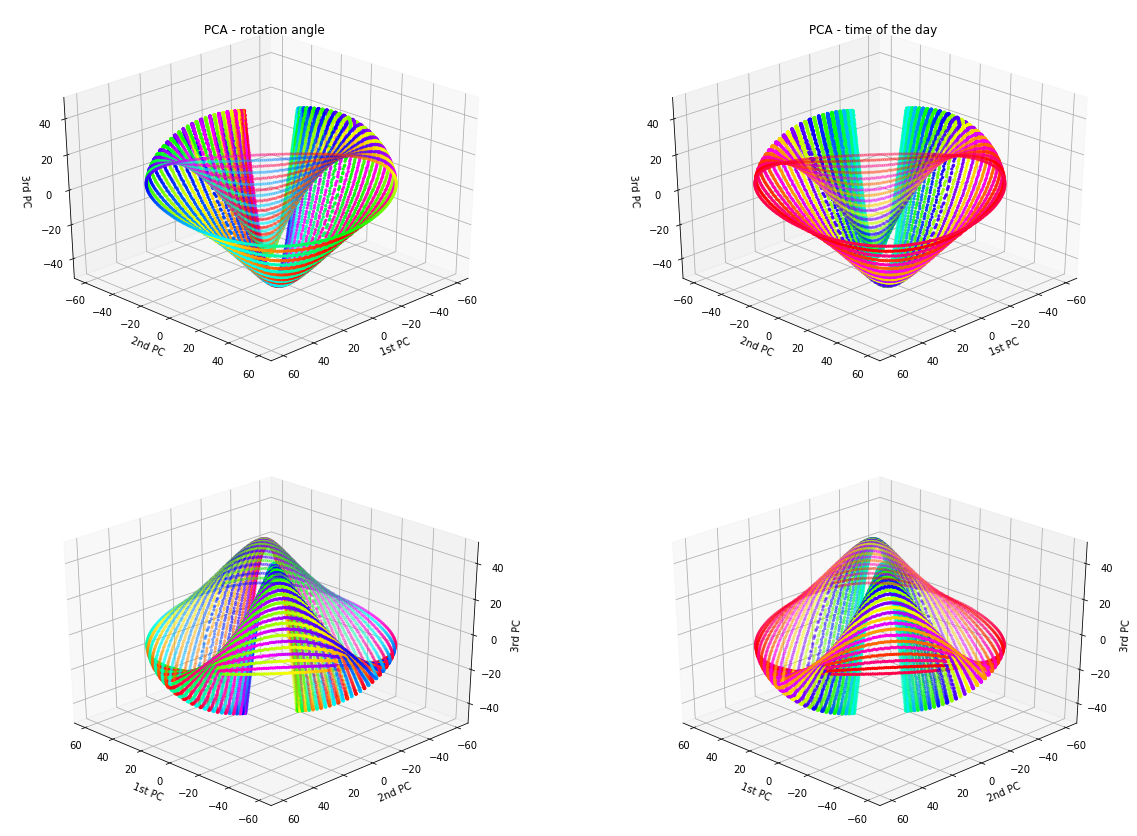

In [4]:
plt.figure(2, figsize=(20, 15))
ax = plt.subplot(221, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 45)
plt.title("PCA - rotation angle")

ax = plt.subplot(222, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=cmx.hsv(i/float(N)), cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 45)
plt.title("PCA - time of the day")

ax = plt.subplot(223, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 135)

ax = plt.subplot(224, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=cmx.hsv(i/float(N)), cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 135)

plt.show()

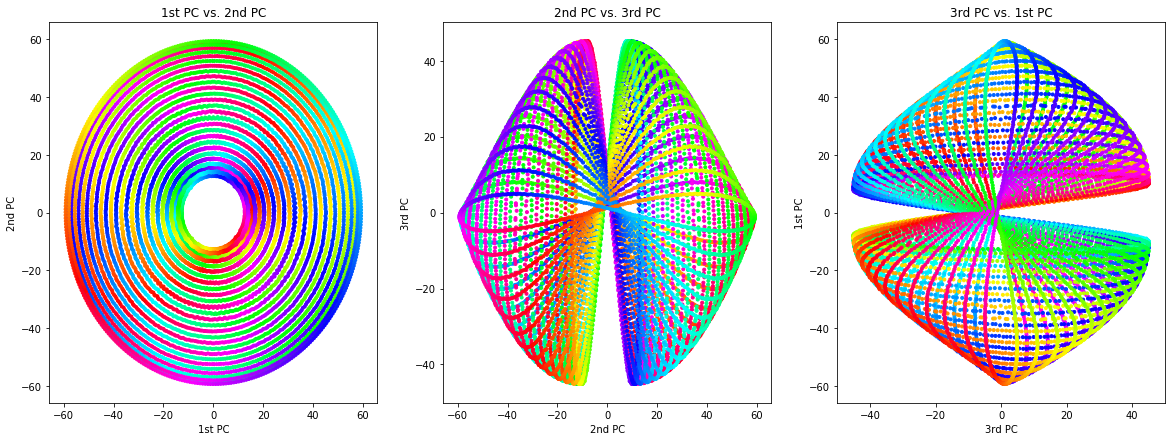

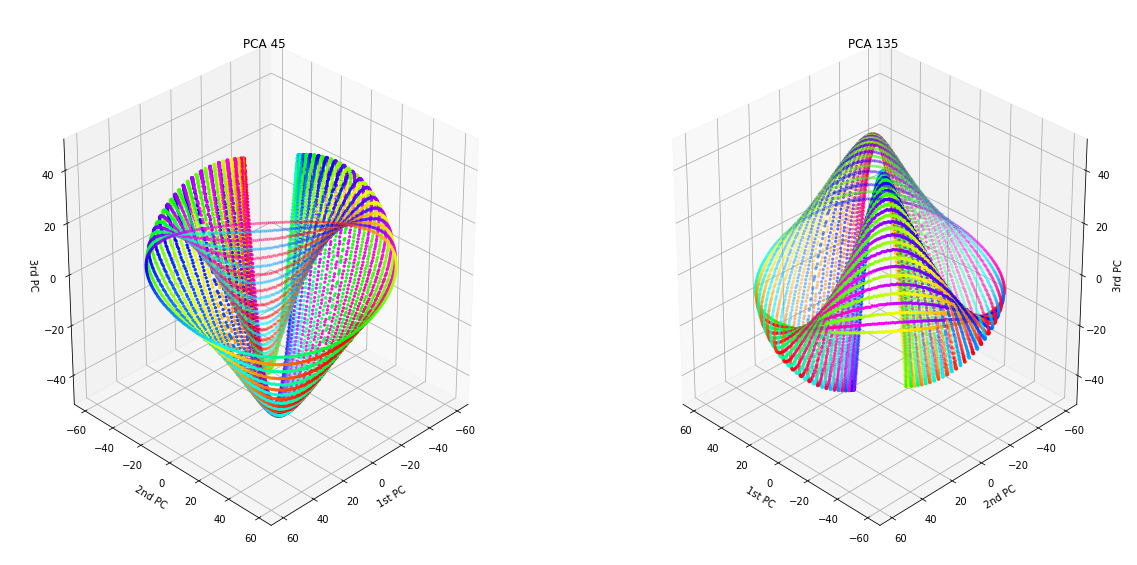

In [5]:
N = x_pca.shape[0] / 360
plt.figure(5, figsize=(20, 7))
plt.subplot(131)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 0], x_pca[(i*360):((i+1)*360), 1],
                marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("1st PC vs. 2nd PC")

plt.subplot(132)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 1], x_pca[(i*360):((i+1)*360), 2],
                marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("2nd PC")
plt.ylabel("3rd PC")
plt.title("2nd PC vs. 3rd PC")

plt.subplot(133)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 2], x_pca[(i*360):((i+1)*360), 0],
                marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("3rd PC")
plt.ylabel("1st PC")
plt.title("3rd PC vs. 1st PC")

plt.figure(6, figsize=(20, 10))
ax = plt.subplot(121, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 45)
plt.title("PCA 45")

ax = plt.subplot(122, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 135)
plt.title("PCA 135")
# plt.colorbar()

plt.show()

# Train Models

Now we will train a **linear regession**, **logistic regression** and **MLP regression** model and evaluate their performance in the reduced dimensions (using PCA) and in the raw data.

In [6]:
ln = LinearRegression(n_jobs=3)
lg = LogisticRegression(n_jobs=3, max_iter=200, multi_class='multinomial', solver='sag')
nn = MLPRegressor(hidden_layer_sizes=(360,), alpha=1e-5, solver='adam', max_iter=200)

## Redunced dimensions

Here we use the first 4 **principal components (PCs)** to train the above 3 models. We can see the their performance is quite similar, however their predictions are different (see plots below). The prediction of the **linear regression** and **MLP regression** models are quite similar, having smooth transisions between similar inputs, while the **logistic regression** model gives a very discritised solution.

Moreover, we can see that none of the models can capture the distribution of the data, having major problems distinguishing the solar and anti-solar sky paterns. This results in poor accuracy in half of the data, confusing the morning and evening times.

Therefore, we conculde that the major PCs are not enough to capture the identity of the global direction during the day.

In [7]:
D = 4
ln.fit(x_pca[..., :D], np.int32(np.rad2deg(y)))
p_ln = np.deg2rad(ln.predict(x_pca[..., :D]))
acc_ln = 1 - angdist(y, p_ln).mean() / (np.pi)
print "Linear Regression   - Accuracy:", acc_ln

lg.fit(x_pca[..., :D], np.int32(np.rad2deg(y)))
p_lg = np.deg2rad(lg.predict(x_pca[..., :D]))
acc_lg = 1 - angdist(y, p_lg).mean() / (np.pi)
print "Logistic Regression - Accuracy:", acc_lg

nn.fit(x_pca[..., :D], np.int32(np.rad2deg(y)))
p_nn = np.deg2rad(nn.predict(x_pca[..., :D]))
acc_nn = 1 - angdist(y, p_nn).mean() / (np.pi)
print "Neural Network      - Accuracy:", acc_nn

Linear Regression   - Accuracy: 0.502117770184
Logistic Regression - Accuracy: 0.519700921706
Neural Network      - Accuracy: 0.535577060739


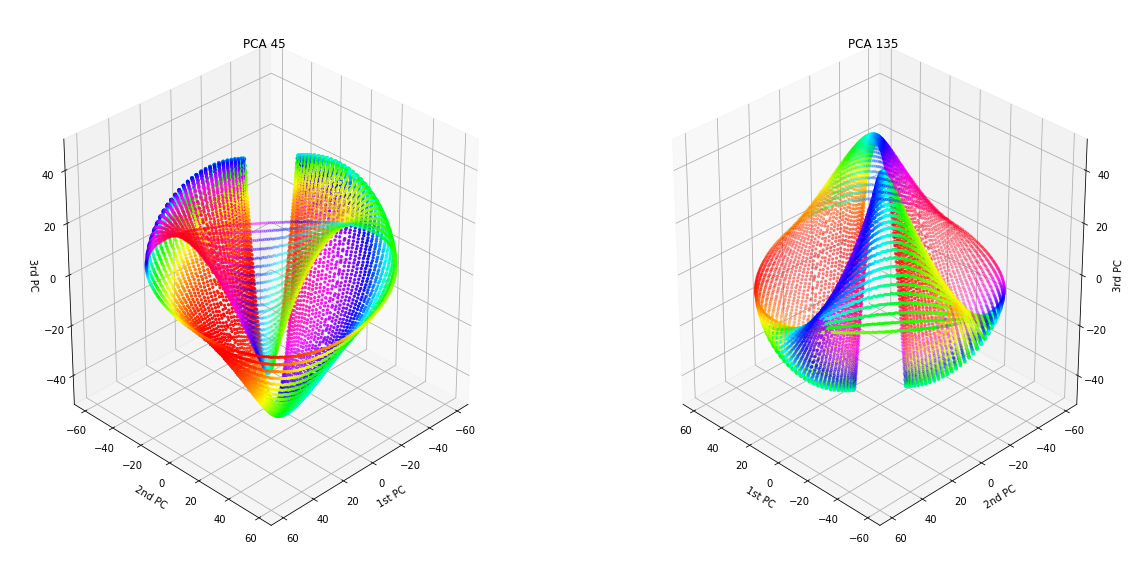

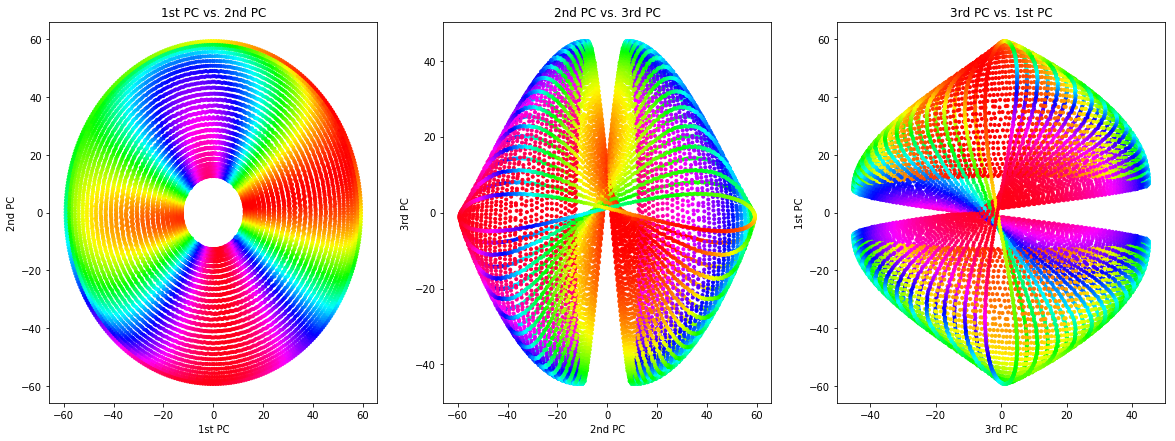

In [8]:
N = x_pca.shape[0] / 360
plt.figure(7, figsize=(20, 7))
plt.subplot(131)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 0], x_pca[(i*360):((i+1)*360), 1],
                marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("1st PC vs. 2nd PC")

plt.subplot(132)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 1], x_pca[(i*360):((i+1)*360), 2],
                marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("2nd PC")
plt.ylabel("3rd PC")
plt.title("2nd PC vs. 3rd PC")

plt.subplot(133)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 2], x_pca[(i*360):((i+1)*360), 0],
                marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("3rd PC")
plt.ylabel("1st PC")
plt.title("3rd PC vs. 1st PC")

plt.figure(8, figsize=(20, 10))
ax = plt.subplot(121, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 45)
plt.title("PCA 45")

ax = plt.subplot(122, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 135)
plt.title("PCA 135")
# plt.colorbar()

plt.show()

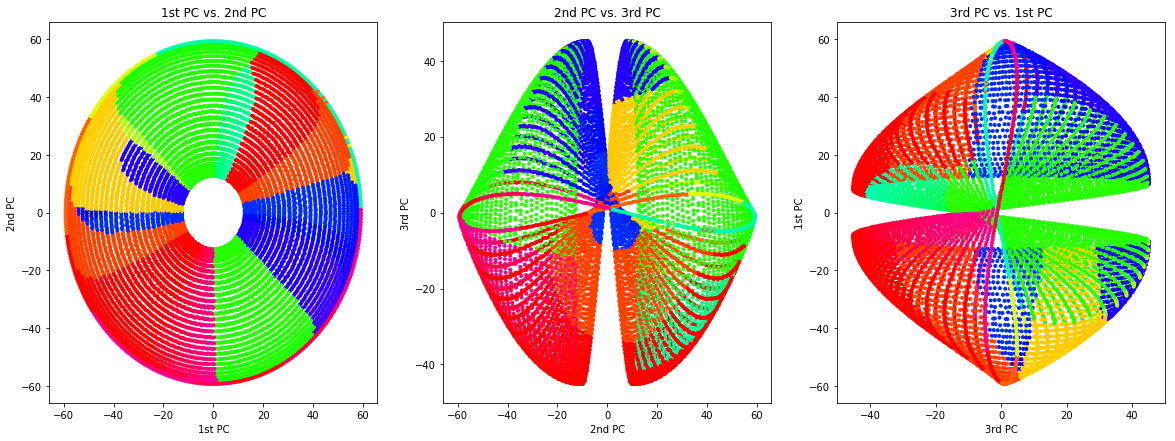

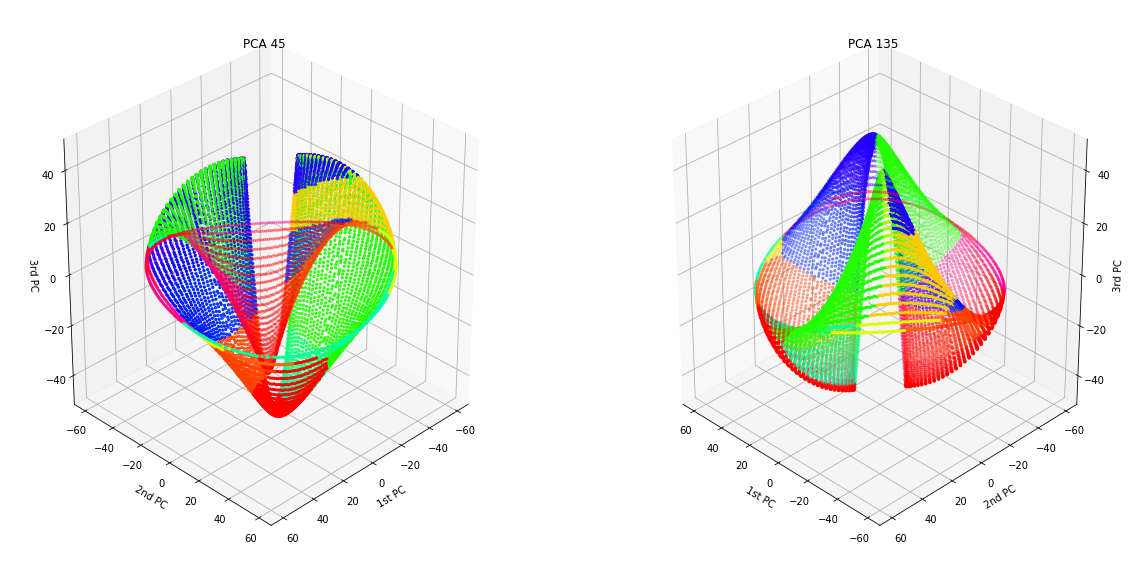

In [9]:
N = x_pca.shape[0] / 360
plt.figure(9, figsize=(20, 7))
plt.subplot(131)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 0], x_pca[(i*360):((i+1)*360), 1],
                marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("1st PC vs. 2nd PC")

plt.subplot(132)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 1], x_pca[(i*360):((i+1)*360), 2],
                marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("2nd PC")
plt.ylabel("3rd PC")
plt.title("2nd PC vs. 3rd PC")

plt.subplot(133)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 2], x_pca[(i*360):((i+1)*360), 0],
                marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("3rd PC")
plt.ylabel("1st PC")
plt.title("3rd PC vs. 1st PC")

plt.figure(10, figsize=(20, 10))
ax = plt.subplot(121, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 45)
plt.title("PCA 45")

ax = plt.subplot(122, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 135)
plt.title("PCA 135")
# plt.colorbar()

plt.show()

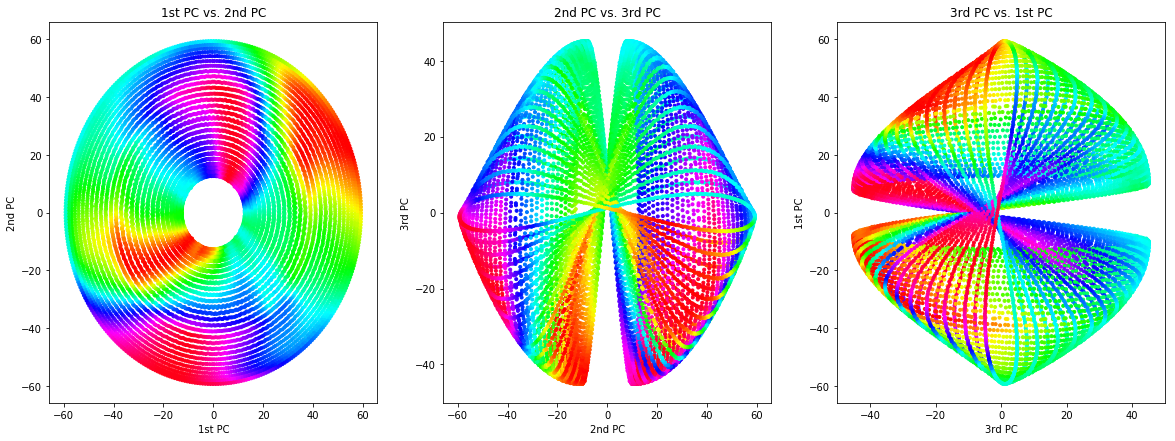

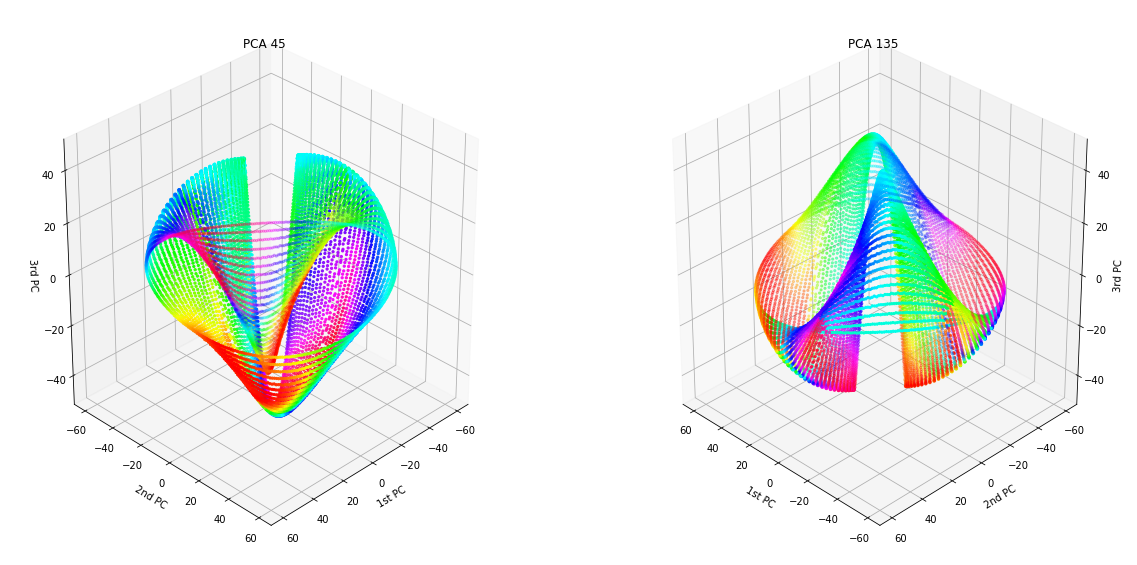

In [10]:
N = x_pca.shape[0] / 360
plt.figure(11, figsize=(20, 7))
plt.subplot(131)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 0], x_pca[(i*360):((i+1)*360), 1],
                marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("1st PC vs. 2nd PC")

plt.subplot(132)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 1], x_pca[(i*360):((i+1)*360), 2],
                marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("2nd PC")
plt.ylabel("3rd PC")
plt.title("2nd PC vs. 3rd PC")

plt.subplot(133)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 2], x_pca[(i*360):((i+1)*360), 0],
                marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("3rd PC")
plt.ylabel("1st PC")
plt.title("3rd PC vs. 1st PC")

plt.figure(12, figsize=(20, 10))
ax = plt.subplot(121, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 45)
plt.title("PCA 45")

ax = plt.subplot(122, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 135)
plt.title("PCA 135")
# plt.colorbar()

plt.show()

## Training models in raw data

Now we train the same models in using the raw data.

In [ ]:
ln.fit(x, np.int32(np.rad2deg(y)))
p_ln = np.deg2rad(ln.predict(x))
acc_ln = 1 - angdist(y, p_ln).mean() / (np.pi)
print "Linear Regression   - Accuracy:", acc_ln

# lg.fit(x, np.int32(np.rad2deg(y)))
# p_lg = np.deg2rad(lg.predict(x))
# acc_lg = 1 - angdist(y, p_lg).mean() / (np.pi)
# print "Logistic Regression - Accuracy:", acc_lg

nn.fit(x, np.int32(np.rad2deg(y)))
p_nn = np.deg2rad(nn.predict(x))
acc_nn = 1 - angdist(y, p_nn).mean() / (np.pi)
print "Neural Network      - Accuracy:", acc_nn

In [ ]:
N = x_pca.shape[0] / 360
plt.figure(7, figsize=(20, 7))
plt.subplot(131)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 0], x_pca[(i*360):((i+1)*360), 1],
                marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("1st PC vs. 2nd PC")

plt.subplot(132)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 1], x_pca[(i*360):((i+1)*360), 2],
                marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("2nd PC")
plt.ylabel("3rd PC")
plt.title("2nd PC vs. 3rd PC")

plt.subplot(133)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 2], x_pca[(i*360):((i+1)*360), 0],
                marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("3rd PC")
plt.ylabel("1st PC")
plt.title("3rd PC vs. 1st PC")

plt.figure(8, figsize=(20, 10))
ax = plt.subplot(121, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 45)
plt.title("PCA 45")

ax = plt.subplot(122, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_ln[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 135)
plt.title("PCA 135")
# plt.colorbar()

plt.show()

In [ ]:
N = x_pca.shape[0] / 360
plt.figure(9, figsize=(20, 7))
plt.subplot(131)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 0], x_pca[(i*360):((i+1)*360), 1],
                marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("1st PC vs. 2nd PC")

plt.subplot(132)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 1], x_pca[(i*360):((i+1)*360), 2],
                marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("2nd PC")
plt.ylabel("3rd PC")
plt.title("2nd PC vs. 3rd PC")

plt.subplot(133)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 2], x_pca[(i*360):((i+1)*360), 0],
                marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("3rd PC")
plt.ylabel("1st PC")
plt.title("3rd PC vs. 1st PC")

plt.figure(10, figsize=(20, 10))
ax = plt.subplot(121, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 45)
plt.title("PCA 45")

ax = plt.subplot(122, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_lg[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 135)
plt.title("PCA 135")
# plt.colorbar()

plt.show()

In [ ]:
N = x_pca.shape[0] / 360
plt.figure(11, figsize=(20, 7))
plt.subplot(131)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 0], x_pca[(i*360):((i+1)*360), 1],
                marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("1st PC vs. 2nd PC")

plt.subplot(132)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 1], x_pca[(i*360):((i+1)*360), 2],
                marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("2nd PC")
plt.ylabel("3rd PC")
plt.title("2nd PC vs. 3rd PC")

plt.subplot(133)
for i in xrange(N):
    plt.scatter(x_pca[(i*360):((i+1)*360), 2], x_pca[(i*360):((i+1)*360), 0],
                marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("3rd PC")
plt.ylabel("1st PC")
plt.title("3rd PC vs. 1st PC")

plt.figure(12, figsize=(20, 10))
ax = plt.subplot(121, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 45)
plt.title("PCA 45")

ax = plt.subplot(122, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_pca[(i*360):((i+1)*360), 0],
        x_pca[(i*360):((i+1)*360), 1],
        x_pca[(i*360):((i+1)*360), 2],
        marker='.', c=p_nn[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")
ax.set_zlabel("3rd PC")
ax.view_init(30, 135)
plt.title("PCA 135")
# plt.colorbar()

plt.show()